In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import sympy as sp
import numpy as np

## Mappeoppgave 2 - Innføring av bompenger i Tromsø: Effekt på bilisters atferd og velferd

### Kapittel 1. Innledning 

Bomstasjonene i Tromsø ble nylig satt i drift, 5. Januar 2023. Inntektene fra bomstasjonene er bilstene sitt bidrag til finansiering av bypakken Tenk Tromsø. Bidraget utgjør ca. 58 % av bypakkens totale økonomiske ramme som er på 6,5 milliarder kroner. På Tenk Tromsø sin nettside skriver de at bypakken er et byutviklingsprojekt der målet er å legge til rette for gange, sykkel og kollektivtransport slik at man oppnår hovedmålet om nullvekst i personbiltransport. Bypakken skal bidra til en mer fremtidsrettet by med bedre fremkommelighet for alle, bedre luft og mindre støy, som rommer vekst i antall hverdagsreiser samtidig som den sikrer et godt bymiljø for alle (Tenk Tromsø, u.å.) 

##### Kort om bomstasjonene 

Det er blitt satt opp 15 bomstasjoner i Tromsø, disse har som nevnt vært i drift fra og med 5. Januar 2023. Tanken bak plasseringen av bomstasjonene er at de skal fange opp de største reisestrømmene i byområdet. Hensikten med dette er at flest mulig skal bidra til å betale. 

Bilister kan anvende AutoPASS som sørger for at passeringer blir automatisk registert, og at man får korrekt rabatt. Når man bestiller AutoPASS-avtale får man en brikke i posten. Brikken festes på innsiden av bilens frontrute. Om man ikke eier en brikke vil man måtte betale full pris for alle gjennomkjøringer. Det er flere selskaper som tilbyr AutoPASS, men det er lik rabatt uansett hvilket selskap det gjøres avtale med. Alle som har en gyldig avtale vil motta en rabatt på 20%. Elbiler med avtale mottar ytterligere 50% rabatt. Det er bompengeselskapet Nord som har ansvaret for å kreve inn bompengene i Tromsø. Alle bomstasjonene har toveisinnkreving. Dvs at man betaler bompenger i begge retninger. Man betaler bare for en passering i timen selv om man kjører gjennom flere bomstajoner. Timesregelen gjelder bare for de som har AutoPASS-avtale. Det er også et månedstak der du maksimalt betaler for 80 passeringer. Månedstaker gjelder for alle kalendermånender, og kun for de med AutoPASS-avtale. I rushperiodene er det dobbel takst. Dette gjelder mandag - fredag mellom kl. 06:30-09:00 og kl. 15:00-17:00. Rushtidsavgiften gjelder ikke på helgedager og offisielle fridager (Tenk Tromsø u.å.)

In [2]:
from IPython.display import Markdown
print("Takstgruppe 1 - Kjøretøy under 3,5 tonn")
tbl=f"""
|        -          | Bensin, diesel og ladbar hybrid  |            -           | Nullutslipskjøretøy |   -                       |
|-------------------|:--------------------------------:|----------------------: |--------------------:|---------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris            |   Gyldig avtale og brikke |      
| Alle bomstasjoner (15) |    12,00                    |   9,60                 | 12,00               |    4,80                   |
"""
display(Markdown(tbl))
print("Rushtidsavgift 06:30-09:00 og 15:00-17:00")
tbl=f"""
|        -          | Bensin, diesel og ladbar hybrid  |  -                     | Nullutslipskjøretøy|   -                        |
|-------------------|:--------------------------------:|----------------------: |-------------------:|----------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris           |   Gyldig avtale og brikke  |
| Alle bomstasjoner (15) |    36,00                    |   28,80                |   36,00            |    14,40                   |
"""
display(Markdown(tbl))

Takstgruppe 1 - Kjøretøy under 3,5 tonn



|        -          | Bensin, diesel og ladbar hybrid  |            -           | Nullutslipskjøretøy |   -                       |
|-------------------|:--------------------------------:|----------------------: |--------------------:|---------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris            |   Gyldig avtale og brikke |      
| Alle bomstasjoner (15) |    12,00                    |   9,60                 | 12,00               |    4,80                   |


Rushtidsavgift 06:30-09:00 og 15:00-17:00



|        -          | Bensin, diesel og ladbar hybrid  |  -                     | Nullutslipskjøretøy|   -                        |
|-------------------|:--------------------------------:|----------------------: |-------------------:|----------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris           |   Gyldig avtale og brikke  |
| Alle bomstasjoner (15) |    36,00                    |   28,80                |   36,00            |    14,40                   |


In [3]:
Trafikkmengde_etter_bompenger = pd.read_csv('https://raw.githubusercontent.com/loopdiggaz/SOK1006/main/Mappe2/trafikkmengde_etter_bompenger.csv', sep=',', encoding= 'unicode_escape')
Trafikkmengde_etter_bompenger.drop(['Unnamed: 0','Fra','Til','Vegreferanse','Felt'], inplace=True, axis=1)
Trafikkmengde_etter_bompenger = Trafikkmengde_etter_bompenger.pivot(index = 'Dato', columns= 'Navn', values = 'Trafikkmengde')
Trafikkmengde_etter_bompenger = Trafikkmengde_etter_bompenger.rename_axis(None, axis=1)
Trafikkmengde_etter_bompenger = Trafikkmengde_etter_bompenger.reset_index()
Trafikkmengde_etter_bompenger['Dato']= pd.to_datetime(Trafikkmengde_etter_bompenger['Dato'])

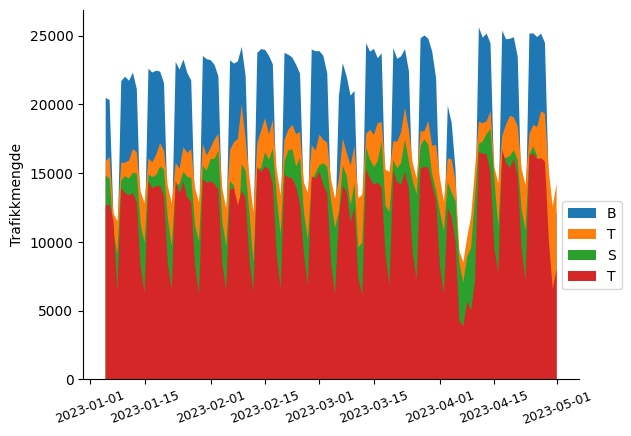

In [10]:
fig, ax = plt.subplots()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_ylabel('Trafikkmengde')
ax.stackplot(Trafikkmengde_etter_bompenger['Dato'],Trafikkmengde_etter_bompenger['BREIVIKA'] ,labels  = 'Breivika')
ax.stackplot(Trafikkmengde_etter_bompenger['Dato'],Trafikkmengde_etter_bompenger['TROMSØBRUA'] , labels = 'Tromsø Brua')
ax.stackplot(Trafikkmengde_etter_bompenger['Dato'],Trafikkmengde_etter_bompenger['Sandnessundbrua'] , labels = 'Sandnessundbrua')
ax.stackplot(Trafikkmengde_etter_bompenger['Dato'],Trafikkmengde_etter_bompenger['Fartstavle Tverrforbindelsen'] , labels = 'Tverrforbindelsen')
ax.legend(bbox_to_anchor=(1.1,.5))
ax.xaxis.set_tick_params(labelsize=9, rotation = 20) 


### Kapittel 3. Bilisters tilpasning til bompenger. 

Modellen som brukes i analysen er en forenkling av virkeligheten. Modellen bygger på noen forutsetninger: 
- Konsumenten velger mellom to goder som kan måles i noe entydig, som i dette tilfellet er kroner. 
- Nytten fra konsum er kun avhengig av eget konsum. 
- Prisene tas for gitt og konsumenten har full oversikt over egenskapene til godene. 
- Hele inntekten til konsumenten går til konsum, sparing blir således sett bort ifra. 
- Formålet til konsumenten er å makismere sin nytte, ved å konsumere mest mulig. 

Konsumenten kan velge mellom 1. Andre goder og 2. Antall kilometer kjørt. Andre goder er blitt gitt prisen 1 kr, slik at det blir et mål i penger. 

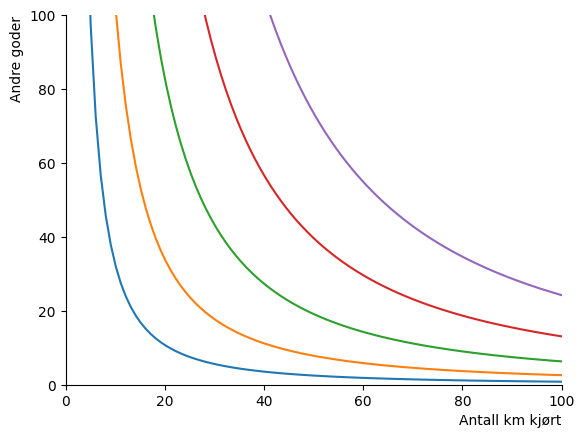

In [5]:
from matplotlib import pyplot as plt
import sympy as sp
import numpy as np

a,b,x_1,x_2,U,U_0 =sp.symbols("x_1 x_2 U U_0 a b", real=True, positive=True)

fig, ax = plt.subplots()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_xlabel('Antall km kjørt', loc = 'right')
ax.set_ylabel('Andre goder', loc = 'top')
ax.set(xlim=(0,100))
ax.set(ylim=(0,100))

x_1, x_2, a, b, U_0 =sp.symbols("x_1 x_2 a b U_0", real=True, positive=True)
U=x_1**a*x_2**b
x_2_ind_sol=sp.solve(U-U_0,x_2)[0]
indiff_x_2=sp.lambdify( (U_0,a,b,x_1), x_2_ind_sol)
indiff_x_2(U_0,a,b,x_1)

x=np.linspace(0.001,100, 100)

for i in range (6, 16, 2):
    ax.plot(x, indiff_x_2(i,.4,.25,x), label='$U_{%s}$' %i)